# Machine Learning Methology for Diagnosing Chronic Kidney Disease

![](e.png)

### All features

![](sns.png)

In [50]:
#import necessary library
import pandas as pd # for data analysis
import numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns #for interactive data visualization
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # or use a very large number like 1000

In [2]:
#load data set
df = pd.read_csv("kidney_disease.csv")
#see forward data
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# see data shape(number of rows and columns)
df.shape

(400, 26)

In [4]:
#see columns
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
#droping id column
df.drop('id', axis = 1, inplace = True)

In [6]:
#rename columns name
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [8]:
# Basic statistical measurements
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood_glucose_random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood_urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum_creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [11]:
#see data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

### Data Preprocessing

In [19]:
# Extract categorical columns (object types)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
print(len(categorical_columns))

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
11


In [18]:
# Extract numerical columns (integer and float types)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_columns)
print(len(numerical_columns))

['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
14


In [20]:
# Iterate through each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'red_blood_cells': [nan 'normal' 'abnormal']
Unique values in 'pus_cell': ['normal' 'abnormal' nan]
Unique values in 'pus_cell_clumps': ['notpresent' 'present' nan]
Unique values in 'bacteria': ['notpresent' 'present' nan]
Unique values in 'hypertension': ['yes' 'no' nan]
Unique values in 'diabetes_mellitus': ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Unique values in 'coronary_artery_disease': ['no' 'yes' '\tno' nan]
Unique values in 'appetite': ['good' 'poor' nan]
Unique values in 'peda_edema': ['no' 'yes' nan]
Unique values in 'aanemia': ['no' 'yes' nan]
Unique values in 'class': ['ckd' 'ckd\t' 'notckd']


In [21]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})


In [22]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [23]:
# Checking missing value
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [25]:
# Checking missing values in numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for column in numerical_columns:
    missing_count = df[column].isnull().sum()
    print(f"Missing values in '{column}': {missing_count}")

Missing values in 'age': 9
Missing values in 'blood_pressure': 12
Missing values in 'specific_gravity': 47
Missing values in 'albumin': 46
Missing values in 'sugar': 49
Missing values in 'blood_glucose_random': 44
Missing values in 'blood_urea': 19
Missing values in 'serum_creatinine': 17
Missing values in 'sodium': 87
Missing values in 'potassium': 88
Missing values in 'haemoglobin': 52
Missing values in 'packed_cell_volume': 71
Missing values in 'white_blood_cell_count': 106
Missing values in 'red_blood_cell_count': 131
Missing values in 'class': 0


In [26]:
# Checking missing values in categorical column
categorical_columns= df.select_dtypes(include=['object']).columns.tolist()

for column in categorical_columns:
    missing_count = df[column].isnull().sum()
    print(f"Missing values in '{column}': {missing_count}")

Missing values in 'red_blood_cells': 152
Missing values in 'pus_cell': 65
Missing values in 'pus_cell_clumps': 4
Missing values in 'bacteria': 4
Missing values in 'hypertension': 2
Missing values in 'diabetes_mellitus': 2
Missing values in 'coronary_artery_disease': 2
Missing values in 'appetite': 1
Missing values in 'peda_edema': 1
Missing values in 'aanemia': 1


### Handing Missing Value with KNNImputer

In [31]:
from sklearn.impute import KNNImputer

# List of categorical and numerical columns
cat_cols = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
num_cols = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Filling missing values for numerical columns
df[num_cols] = knn_imputer.fit_transform(df[num_cols])

# Filling missing values for categorical columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.value_counts().idxmax()))

# Verify that missing values are filled
print(df.isnull().sum())


age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64


### Exploratory data analysis

##### Numerical columns analysis


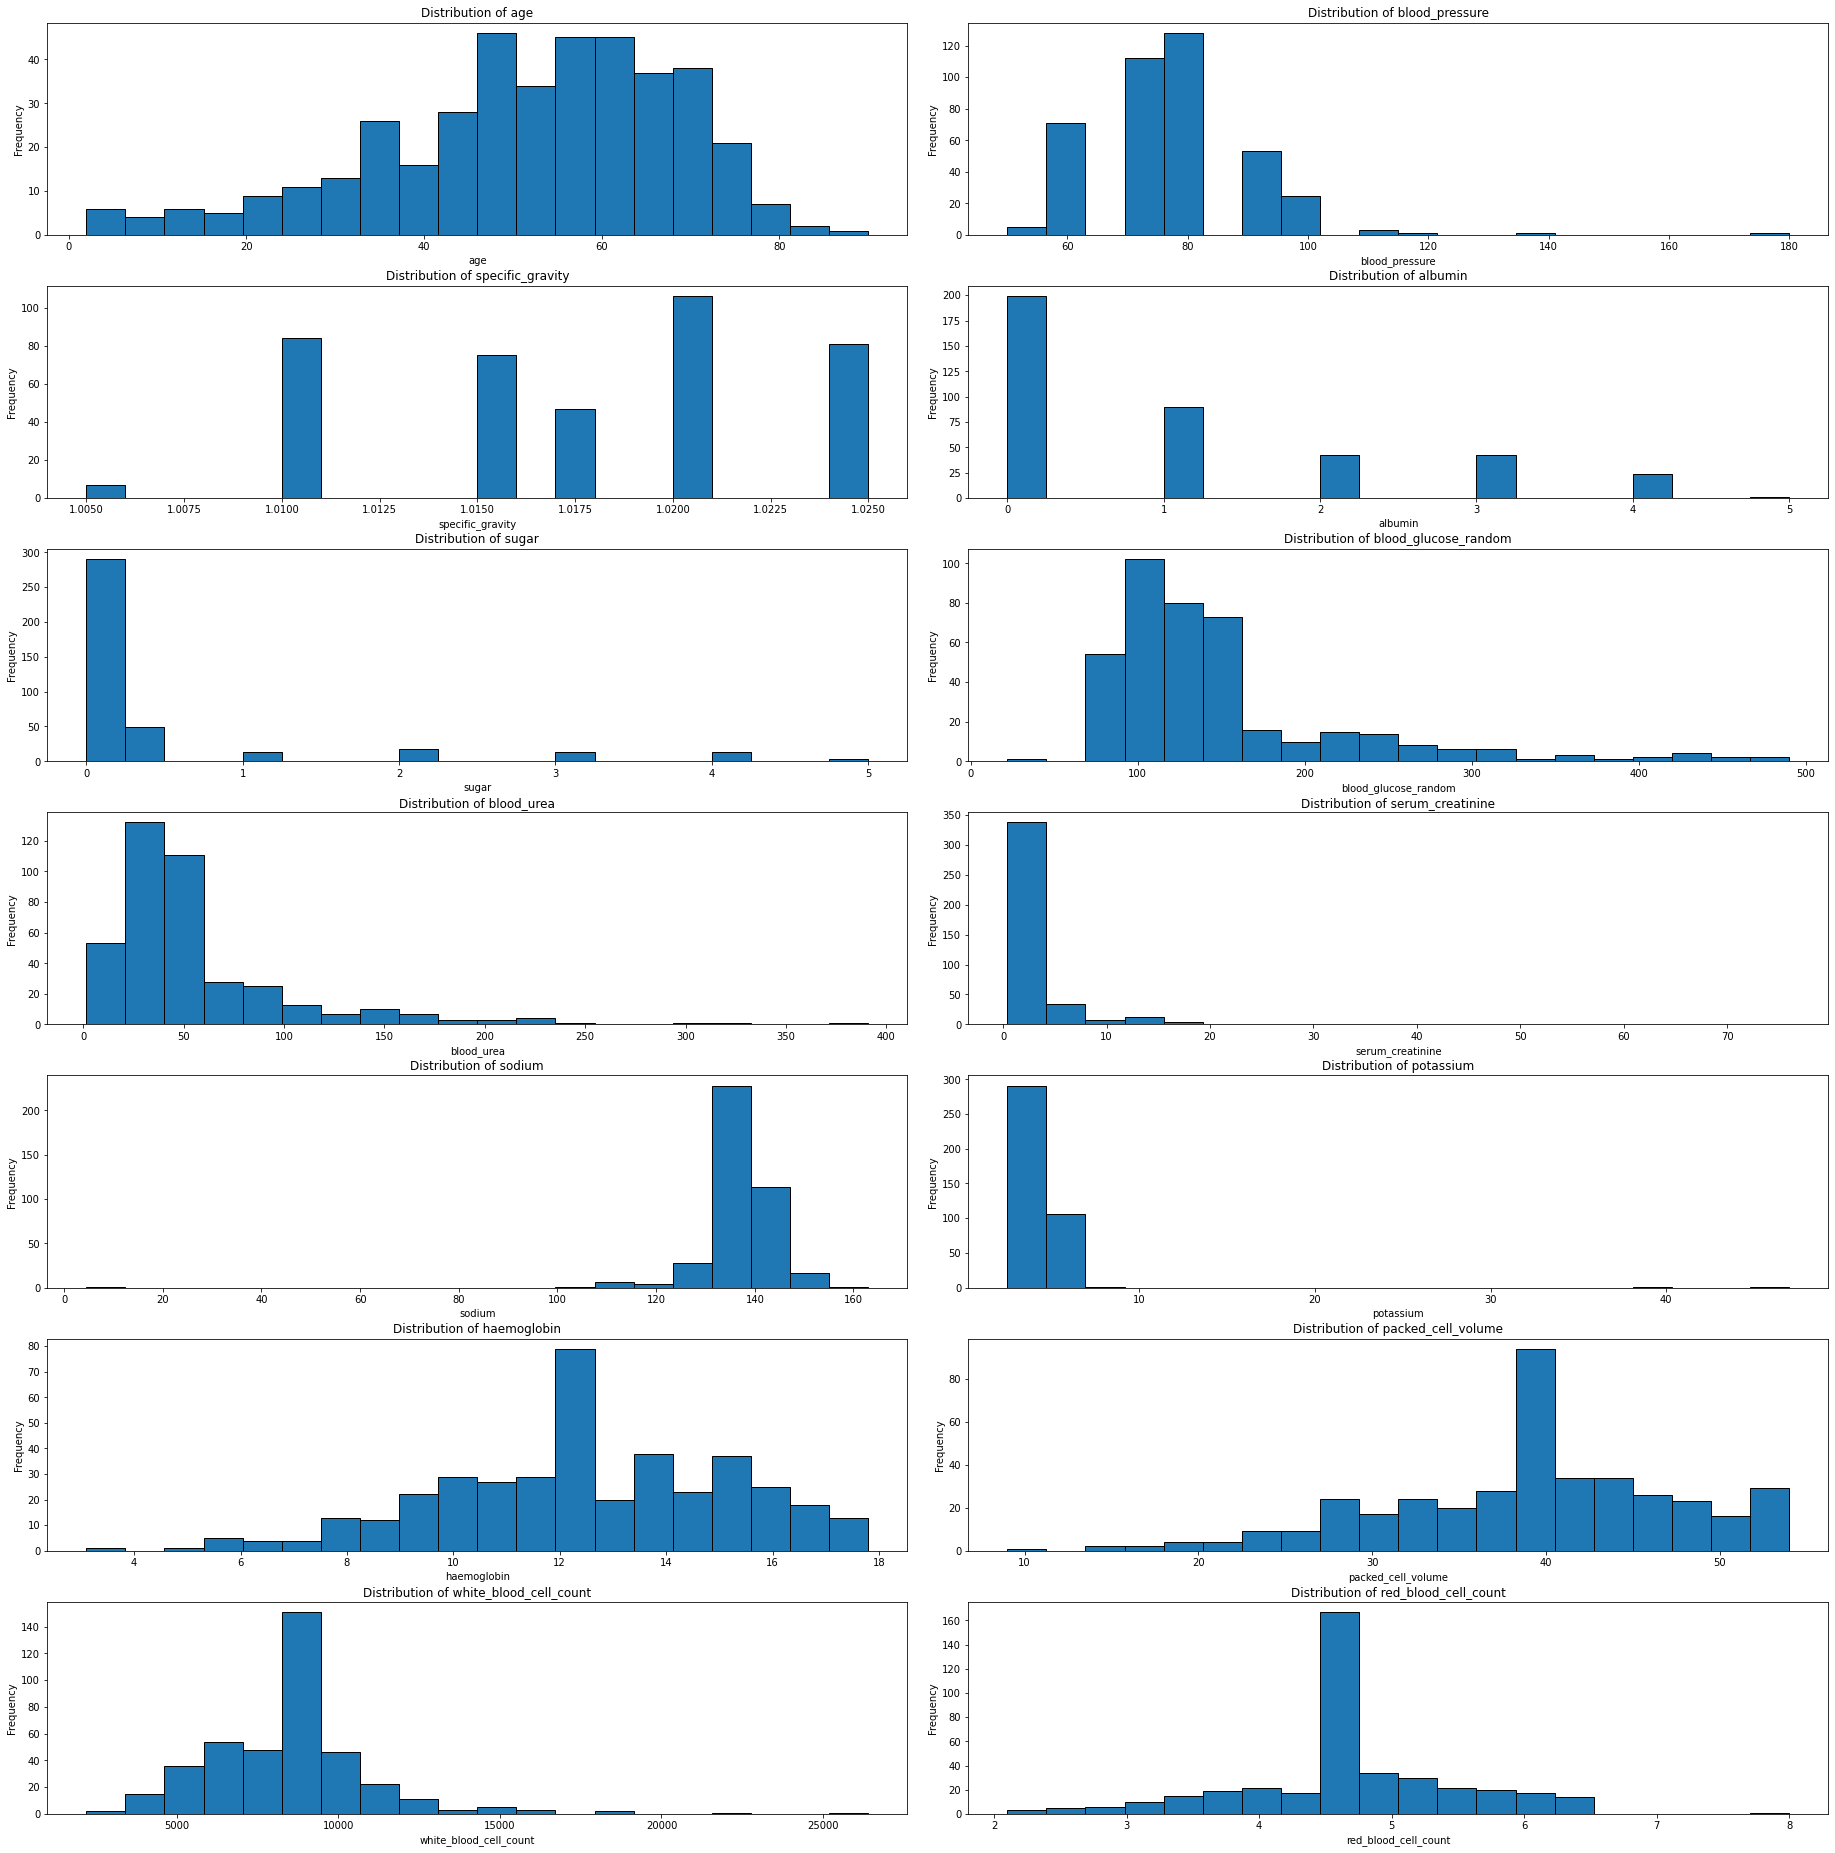

In [35]:
import matplotlib.pyplot as plt

# Calculate the number of rows and columns needed for the grid
num_rows = len(num_cols) // 2 + len(num_cols) % 2
num_cols_per_row = 2

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(26, 26))
fig.tight_layout(pad=3.0)  # Adjust the spacing between plots

for i, column in enumerate(num_cols):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    
    axes[row, col].hist(df[column], bins=20, edgecolor='k')
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(num_cols), num_rows * num_cols_per_row):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    axes[row, col].axis('off')

plt.show()


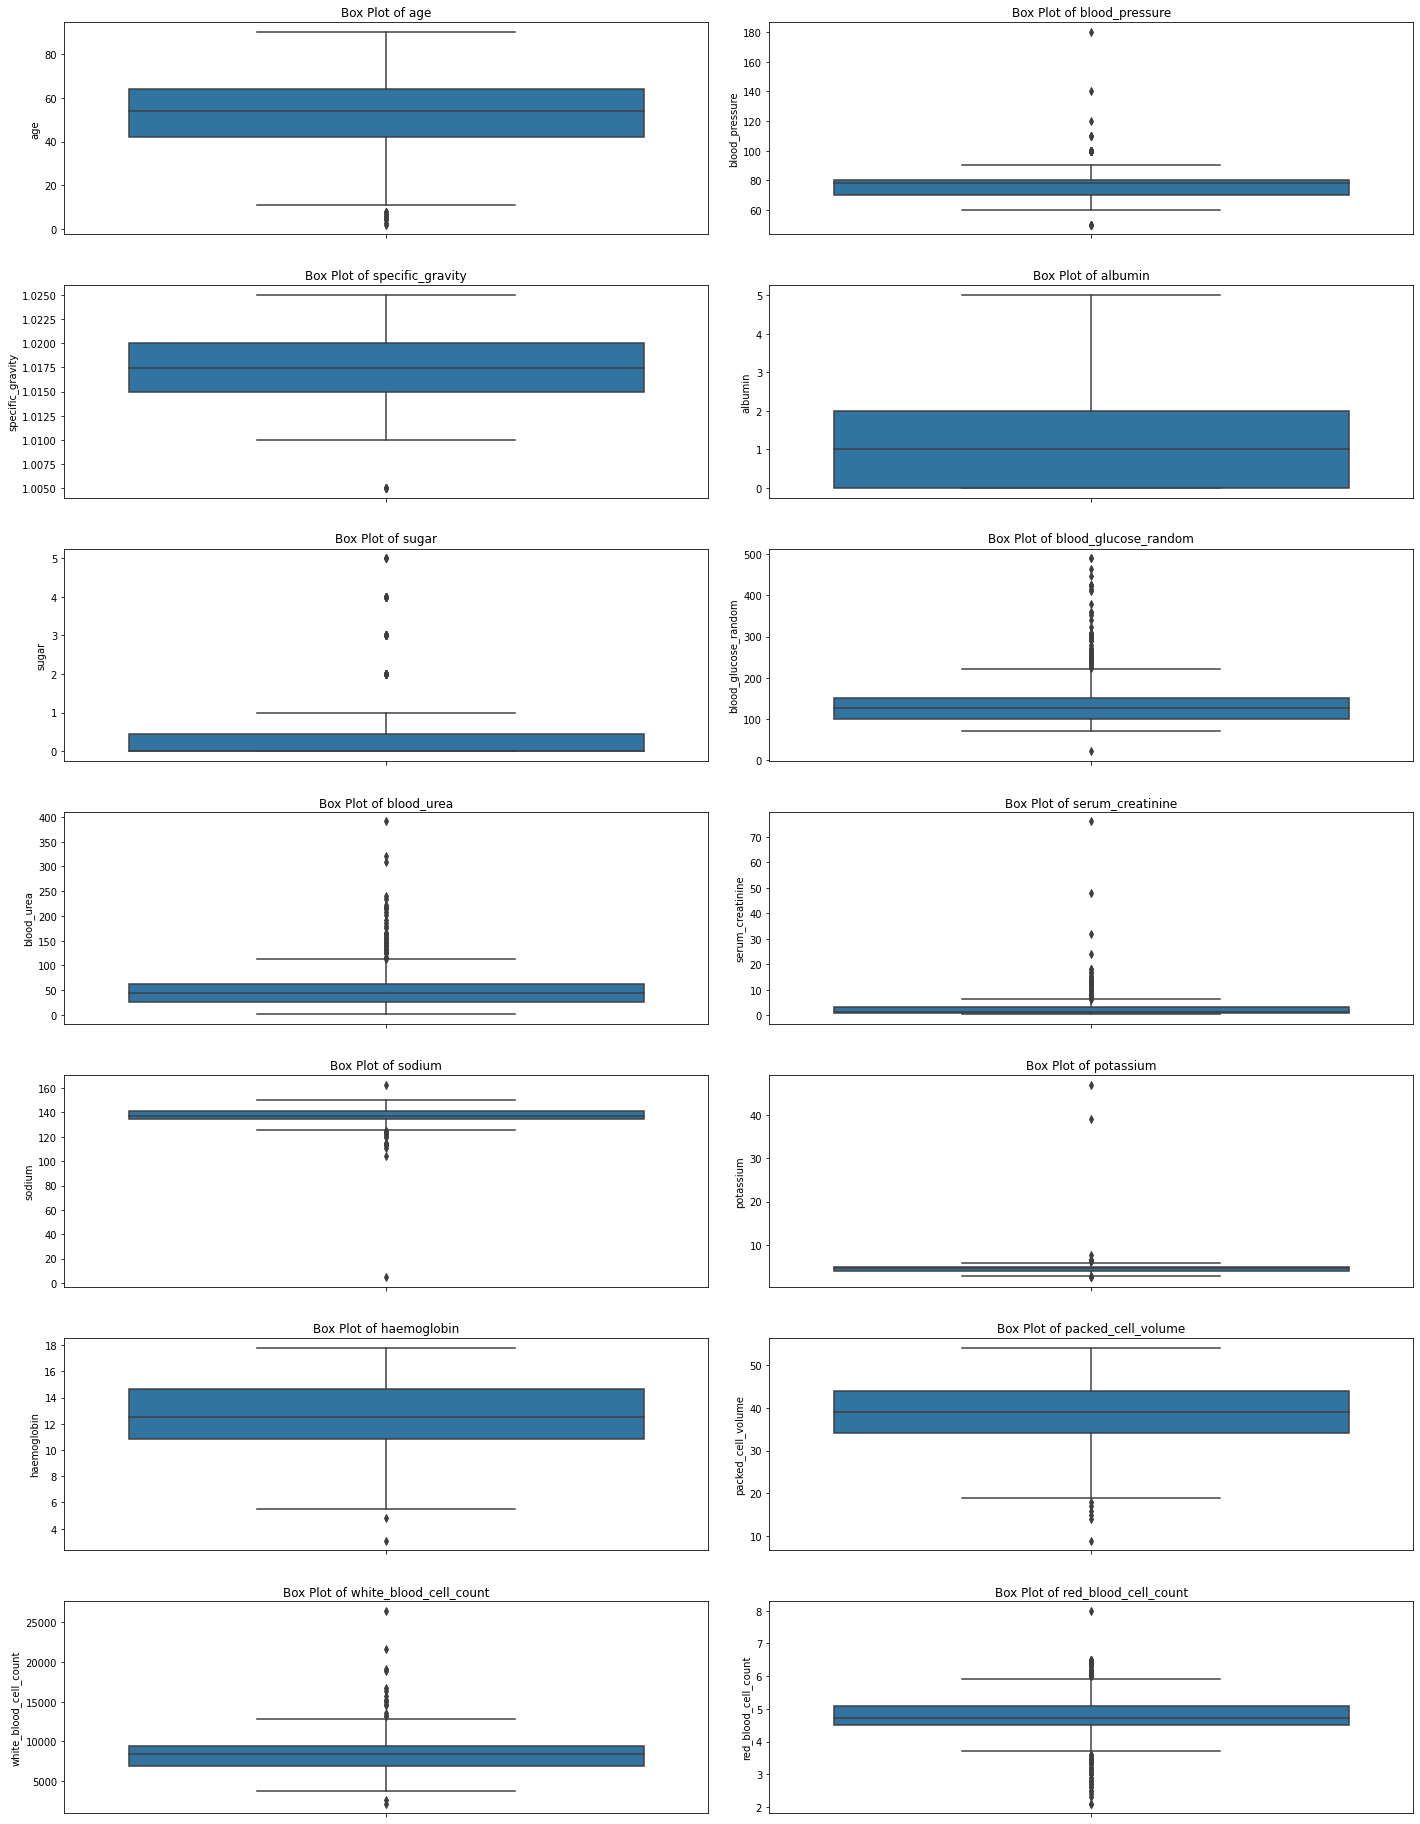

In [39]:

# Calculate the number of rows and columns needed for the grid
num_rows = len(num_cols) // 2 + len(num_cols) % 2
num_cols_per_row = 2

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 26))
fig.tight_layout(pad=3.0)  # Adjust the spacing between plots

for i, column in enumerate(num_cols):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')
    axes[row, col].set_ylabel(column)

# Hide any empty subplots
for i in range(len(num_cols), num_rows * num_cols_per_row):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    axes[row, col].axis('off')

plt.show()


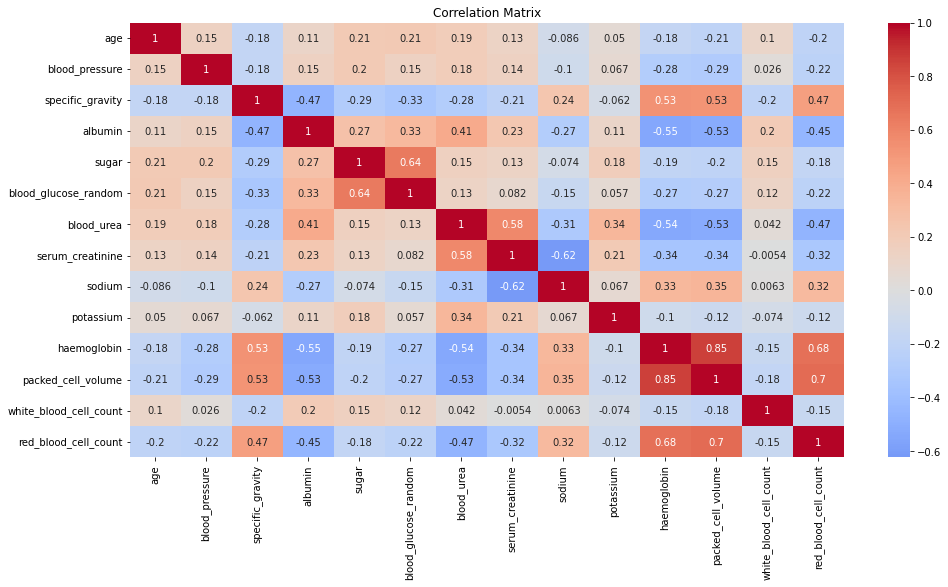

In [41]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

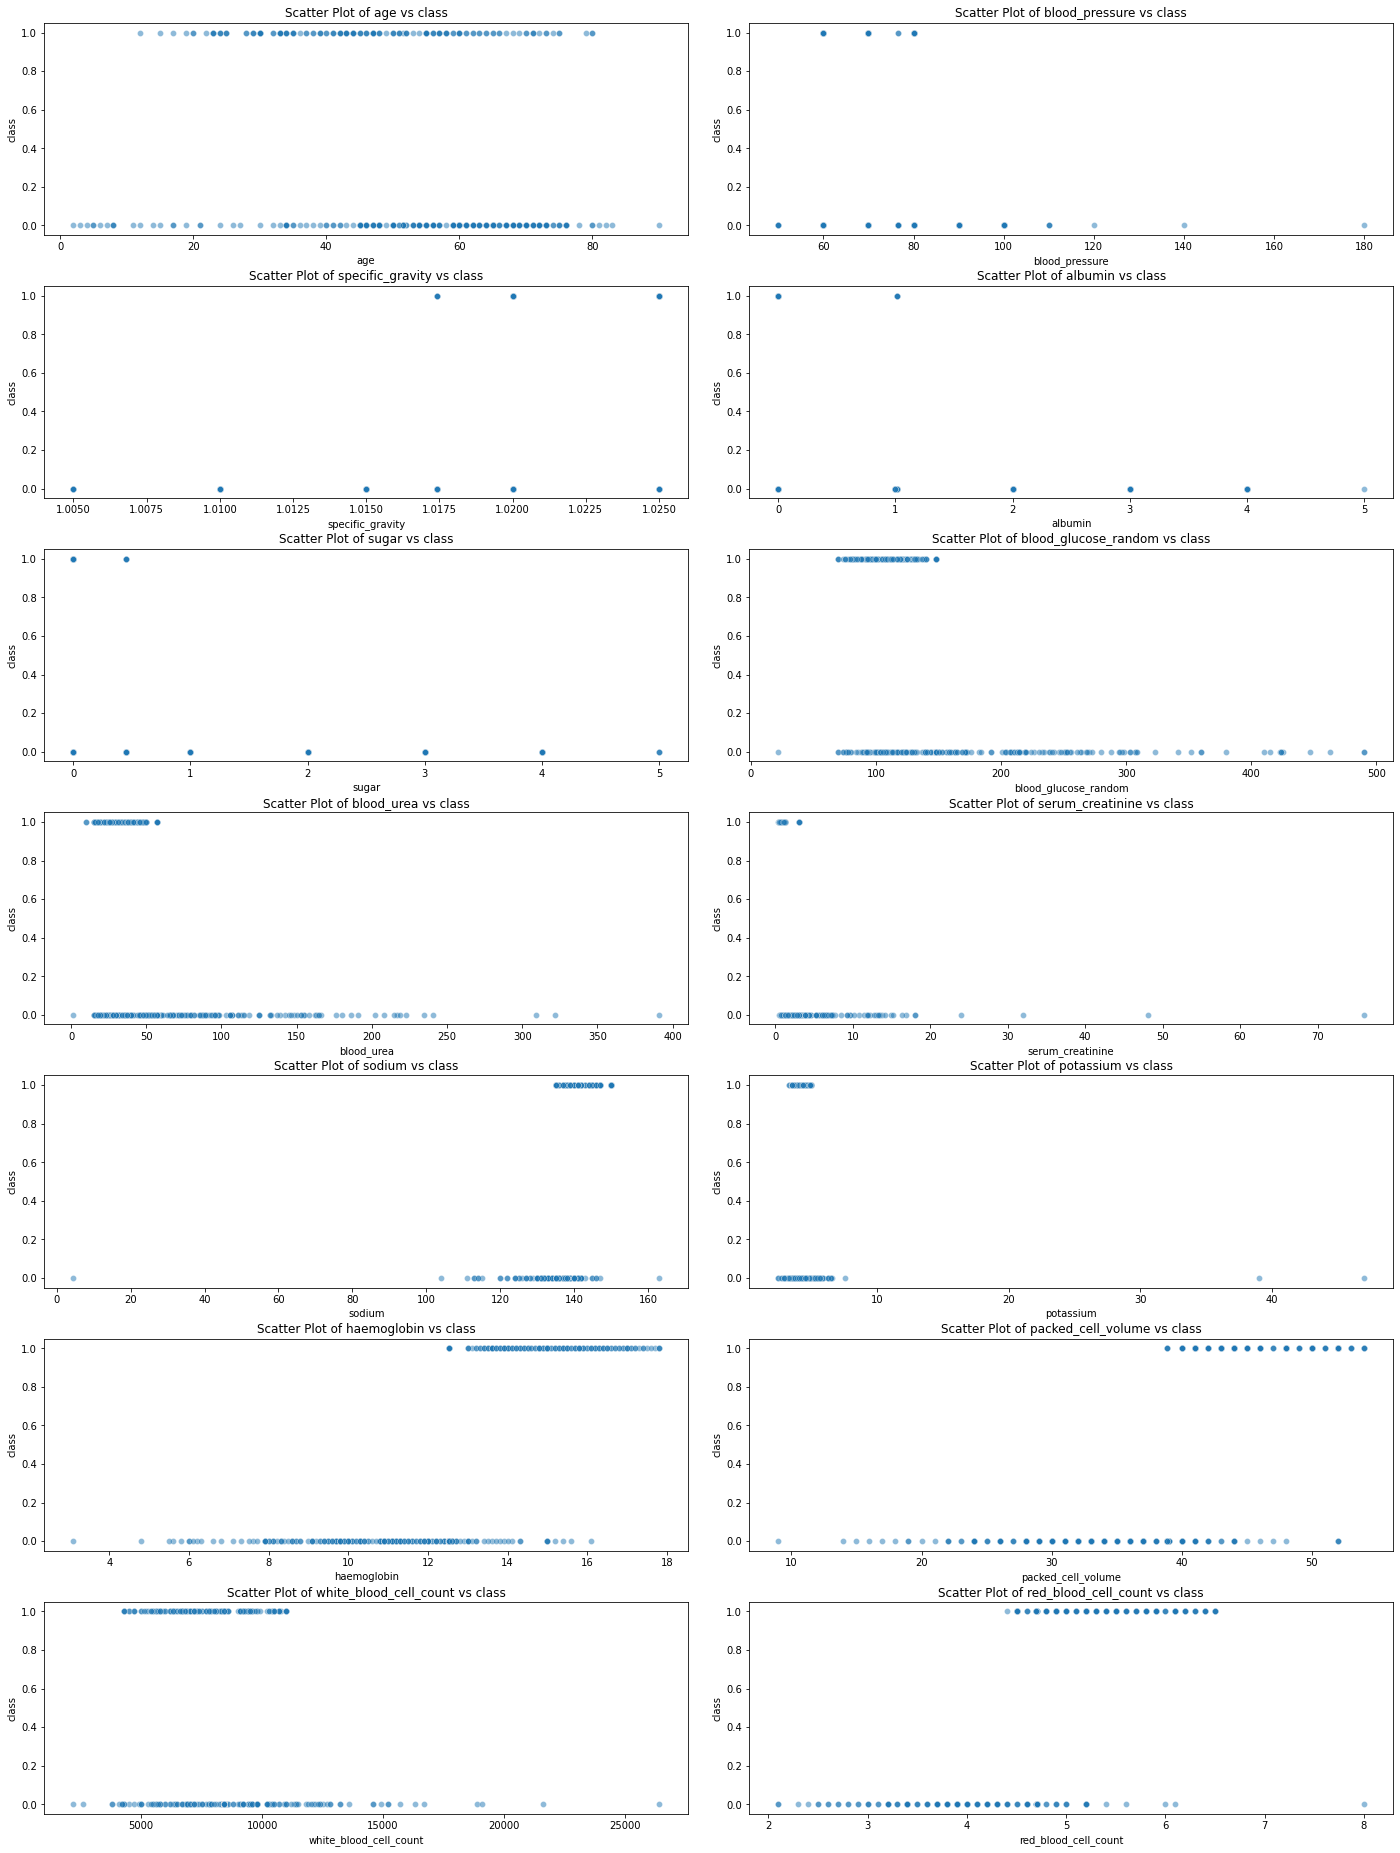

In [44]:
target_col = 'class'  # target variable 

# Calculate the number of rows and columns needed for the grid
num_rows = len(num_cols) // 2 + len(num_cols) % 2
num_cols_per_row = 2

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 26))
fig.tight_layout(pad=3.0)  # Adjust the spacing between plots

for i, column in enumerate(num_cols):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    
    sns.scatterplot(data=df, x=column, y=target_col, alpha=0.5, ax=axes[row, col])
    axes[row, col].set_title(f'Scatter Plot of {column} vs {target_col}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel(target_col)

# Hide any empty subplots
for i in range(len(num_cols), num_rows * num_cols_per_row):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    axes[row, col].axis('off')

plt.show()


#### Feature Enginnering

In [53]:
cat_col_unique_counts = {}

for col in cat_cols:
    unique_count = df[col].nunique()
    cat_col_unique_counts[col] = unique_count
    print(f"{col} has: {unique_count} categories\n")


red_blood_cells has: 2 categories

pus_cell has: 2 categories

pus_cell_clumps has: 2 categories

bacteria has: 2 categories

hypertension has: 2 categories

diabetes_mellitus has: 2 categories

coronary_artery_disease has: 2 categories

appetite has: 2 categories

peda_edema has: 2 categories

aanemia has: 2 categories

class has: 2 categories



In [54]:
# lebelEncoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [55]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.000000,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.000000,5.200000,1,1,0,0,0,0,0
1,7.0,50.000000,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.000000,4.707435,0,0,0,0,0,0,0
2,62.0,80.000000,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.000000,4.707435,0,1,0,1,0,1,0
3,48.0,70.000000,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.000000,3.900000,1,0,0,1,1,1,0
4,51.0,80.000000,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.000000,4.600000,0,0,0,0,0,0,0
5,60.0,90.000000,1.015,3.0,0.0,1,1,0,0,74.000000,25.0,1.1,142.000000,3.200000,12.2,39.0,7800.000000,4.400000,1,1,0,0,1,0,0
6,68.0,70.000000,1.010,0.0,0.0,1,1,0,0,100.000000,54.0,24.0,104.000000,4.000000,12.4,36.0,8406.122449,4.707435,0,0,0,0,0,0,0
7,24.0,76.469072,1.015,2.0,4.0,1,0,0,0,410.000000,31.0,1.1,137.528754,4.627244,12.4,44.0,6900.000000,5.000000,0,1,0,0,1,0,0
8,52.0,100.000000,1.015,3.0,0.0,1,0,1,0,138.000000,60.0,1.9,137.528754,4.627244,10.8,33.0,9600.000000,4.000000,1,1,0,0,0,1,0
9,53.0,90.000000,1.020,2.0,0.0,0,0,1,0,70.000000,107.0,7.2,114.000000,3.700000,9.5,29.0,12100.000000,3.700000,1,1,0,1,0,1,0


In [56]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

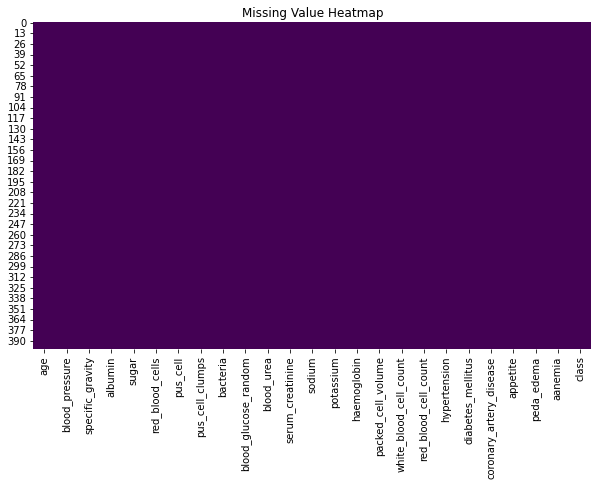

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

### MODEL BUILDING

## Train Test split and Normalization

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler
pipeline_standard = Pipeline([
    ('scaler', StandardScaler())  # Step 1: StandardScaler for normalization
])

# Create a pipeline with MinMaxScaler
pipeline_minmax = Pipeline([
    ('scaler', MinMaxScaler())  # Step 1: MinMaxScaler for normalization
])

# Fit and transform using the pipeline with StandardScaler
X_train_standard = pipeline_standard.fit_transform(X_train)

# Fit and transform using the pipeline with MinMaxScaler
X_train_minmax = pipeline_minmax.fit_transform(X_train)


In [73]:
print("X shape:", X_train.shape)

print("y shape:", y_train.shape)

X shape: (320, 24)
y shape: (320,)


# Model building

### Logistic Regression

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'C': 16.68100537200059, 'penalty': 'l2', 'solver': 'liblinear'}
Train Accuracy: 0.9906
Test Accuracy: 0.9750


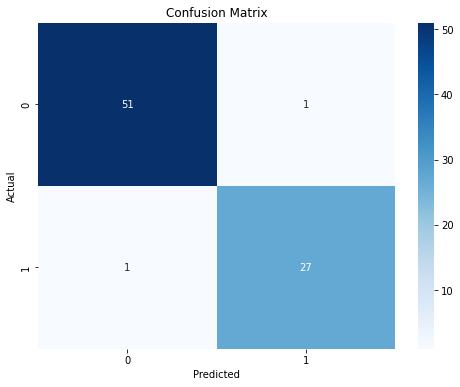

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [82]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],  # 'none', 'l1', 'l2', 'elasticnet'
    'C': np.logspace(-5, 2, num=10)
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

# Access the best model and its parameters
best_model = grid.best_estimator_
best_params = grid.best_params_
print(f"Best params: {best_params}")

# Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(f"Classification Report :- \n {classification_report(y_test, y_test_pred)}")


### KNN 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Training Result:

Training Accuracy Score: 1.0000

Testing Result:

Testing Accuracy Score: 0.7875

Confusion Matrix (Training):
[[198   0]
 [  0 122]]

Confusion Matrix (Testing):
[[36 16]
 [ 1 27]]

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.97      0.69      0.81        52
           1       0.63      0.96      0.76        28

    accuracy                           0.79        80
   macro avg       0.80      0.83      0.78        80
weighted avg       0.85      0.79      0.79        80



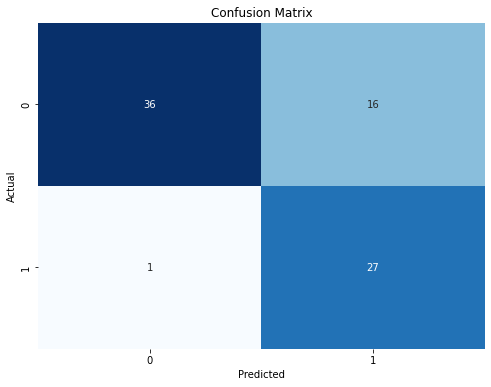

In [89]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=1, cv=5)
model = grid.fit(X_train, y_train).best_estimator_

best_params = grid.best_params_
print(f"Best params: {best_params}")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Define a function to print scores
def print_score(model, X_train, y_train, X_test, y_test):
    print("Training Result:\n")
    acc_train = accuracy_score(y_train, model.predict(X_train))
    print(f"Training Accuracy Score: {acc_train:.4f}\n")
    conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
    
    print("Testing Result:\n")
    acc_test = accuracy_score(y_test, model.predict(X_test))
    print(f"Testing Accuracy Score: {acc_test:.4f}\n")
    conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))

    print(f"Confusion Matrix (Training):\n{conf_matrix_train}\n")
    print(f"Confusion Matrix (Testing):\n{conf_matrix_test}\n")
    print(f"Classification Report (Testing):\n{classification_report(y_test, model.predict(X_test))}")

print_score(model, X_train, y_train, X_test, y_test)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Random Forest

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9875 



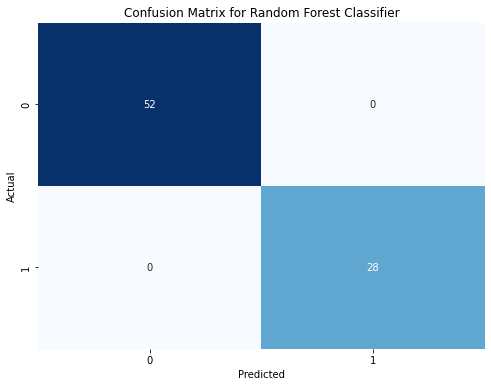

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rd_clf = RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto', min_samples_leaf=2, min_samples_split=3, n_estimators=130)
rd_clf.fit(X_train, y_train)

# Accuracy score, confusion matrix and classification report of random forest
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

#conf_matrix_rf = confusion_matrix(y_test, rd_clf.predict(X_test))
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

#print(f"Confusion Matrix :- \n{conf_matrix_rf}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

### SVM

Training Accuracy of SVM Classifier: 1.0000
Test Accuracy of SVM Classifier: 0.6500


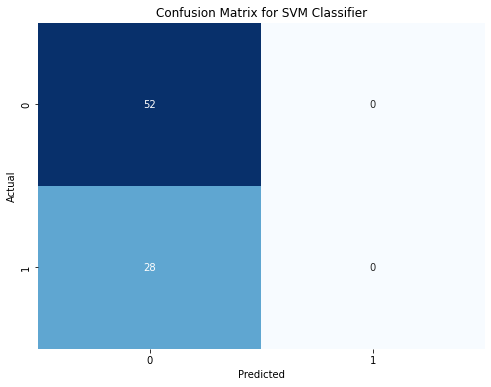

Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [96]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an instance of the SVM classifier
svm_clf = SVC(kernel='rbf', C=1, gamma='auto')

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

# Calculate accuracy scores
svm_train_acc = accuracy_score(y_train, y_train_pred)
svm_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy of SVM Classifier: {svm_train_acc:.4f}")
print(f"Test Accuracy of SVM Classifier: {svm_test_acc:.4f}")

# Calculate confusion matrix
#conf_matrix_svm = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

#print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

### Naive Biyes

Training Accuracy of Naive Bayes Classifier: 0.9625
Test Accuracy of Naive Bayes Classifier: 0.9625
Confusion Matrix:
[[51  1]
 [ 2 26]]


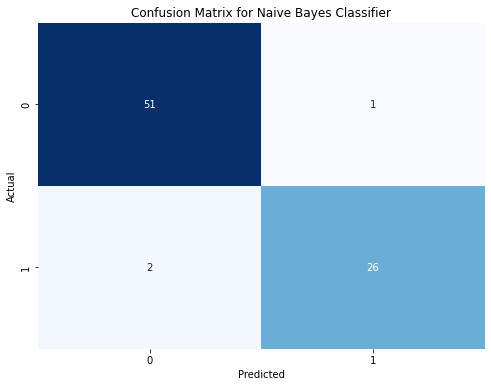

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.96      0.93      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create an instance of the Naive Bayes classifier
nb_clf = GaussianNB()

# Train the Naive Bayes model
nb_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = nb_clf.predict(X_train)
y_test_pred = nb_clf.predict(X_test)

# Calculate accuracy scores
nb_train_acc = accuracy_score(y_train, y_train_pred)
nb_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy of Naive Bayes Classifier: {nb_train_acc:.4f}")
print(f"Test Accuracy of Naive Bayes Classifier: {nb_test_acc:.4f}")

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_test_pred)

print(f"Confusion Matrix:\n{conf_matrix_nb}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

### KNN

Training Accuracy of KNN Classifier: 0.8531
Test Accuracy of KNN Classifier: 0.7250
Confusion Matrix:
[[33 19]
 [ 3 25]]


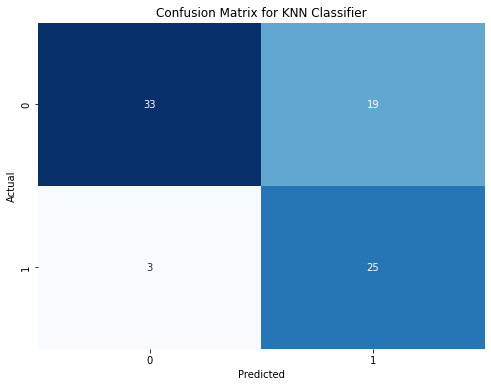

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        52
           1       0.57      0.89      0.69        28

    accuracy                           0.73        80
   macro avg       0.74      0.76      0.72        80
weighted avg       0.79      0.72      0.73        80



In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an instance of the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model
knn_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)

# Calculate accuracy scores
knn_train_acc = accuracy_score(y_train, y_train_pred)
knn_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy of KNN Classifier: {knn_train_acc:.4f}")
print(f"Test Accuracy of KNN Classifier: {knn_test_acc:.4f}")

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_test_pred)

print(f"Confusion Matrix:\n{conf_matrix_knn}")
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=1, cv=5)
best_knn_model = grid.fit(X_train, y_train).best_estimator_
from sklearn.metrics import accuracy_score

# Predicting on the test set
y_test_pred = best_knn_model.predict(X_test)

# Calculating accuracy
knn_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy of the Best KNN Model: {knn_accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Test Accuracy of the Best KNN Model: 0.7875


### Logistic Regression

Training Accuracy of Logistic Regression Classifier: 0.9187
Test Accuracy of Logistic Regression Classifier: 0.9250
Confusion Matrix:
[[49  3]
 [ 3 25]]


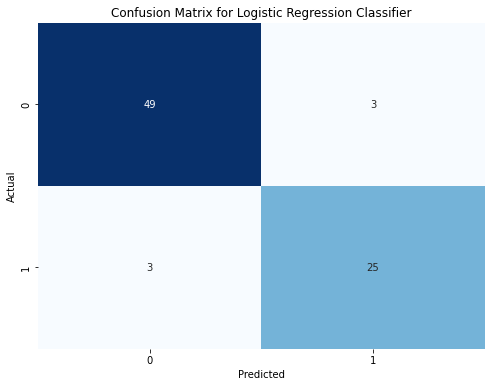

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.89      0.89      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an instance of the Logistic Regression classifier
logreg_clf = LogisticRegression()

# Train the Logistic Regression model
logreg_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = logreg_clf.predict(X_train)
y_test_pred = logreg_clf.predict(X_test)

# Calculate accuracy scores
logreg_train_acc = accuracy_score(y_train, y_train_pred)
logreg_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy of Logistic Regression Classifier: {logreg_train_acc:.4f}")
print(f"Test Accuracy of Logistic Regression Classifier: {logreg_test_acc:.4f}")

# Calculate confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_test_pred)

print(f"Confusion Matrix:\n{conf_matrix_logreg}")
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model
y_test_pred = best_model.predict(X_test)
logreg_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy of Best Logistic Regression Classifier: {logreg_test_acc:.4f}")


Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy of Best Logistic Regression Classifier: 0.9750


## Forward Nural Network

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [110]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [112]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [113]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 1s 39ms/step - loss: 0.5139 - accuracy: 0.7109 - val_loss: 0.4125 - val_accuracy: 0.9062
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.3431 - accuracy: 0.9766 - val_loss: 0.2877 - val_accuracy: 0.9844
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2475 - accuracy: 0.9844 - val_loss: 0.2118 - val_accuracy: 0.9844
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1837 - accuracy: 0.9844 - val_loss: 0.1592 - val_accuracy: 0.9688
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.1360 - accuracy: 0.9883 - val_loss: 0.1230 - val_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1014 - accuracy: 0.9922 - val_loss: 0.0979 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0778 - accuracy: 0.9961 - val_loss: 0.0800 - val_accuracy: 1.0000
Epoch 8/10
8/8 [=================

In [114]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

3/3 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9875
Test Loss: 0.0431
Test Accuracy: 0.9875


## model evaluation

In [120]:
from sklearn.linear_model import LogisticRegression

# Create and train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate Logistic Regression
lr_pred = lr_model.predict(X_test)
print_metrics("Logistic Regression", y_test, lr_pred)


Logistic Regression Metrics:
Accuracy: 0.9250
Precision: 0.8929
Recall: 0.8929
F1-score: 0.8929
ROC AUC: 0.9176



In [123]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Iterate through each model
for name, model in models:
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results_df = results_df.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }, ignore_index=True)

# Display the results DataFrame
print(results_df)


                    Model Accuracy Precision Recall F1 Score ROC AUC
0     Logistic Regression   0.9250    0.8929 0.8929   0.8929  0.9176
1           Random Forest   1.0000    1.0000 1.0000   1.0000  1.0000
2  Support Vector Machine   0.6500    0.0000 0.0000   0.0000  0.5000
3             Naive Bayes   0.9625    0.9630 0.9286   0.9455  0.9547
4     K-Nearest Neighbors   0.7250    0.5682 0.8929   0.6944  0.7637


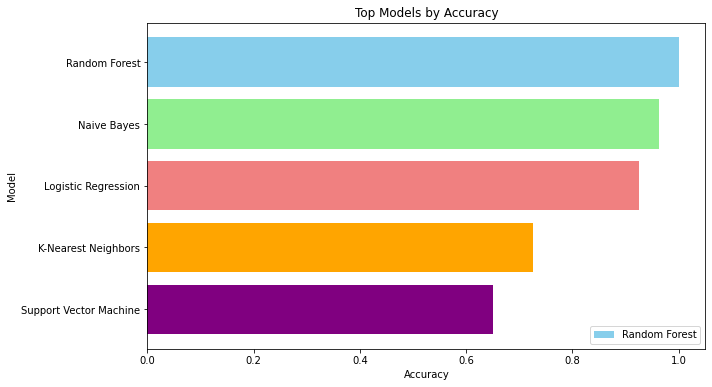

In [125]:
#import matplotlib.pyplot as plt

# Define colors for each model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple']

# Sort the results DataFrame by Accuracy Score in descending order
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
plt.barh(results_df_sorted['Model'], results_df_sorted['Accuracy'], color=colors)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Top Models by Accuracy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy on top

# Add a legend with model names and corresponding colors
plt.legend(results_df_sorted['Model'], loc='lower right')

plt.show()


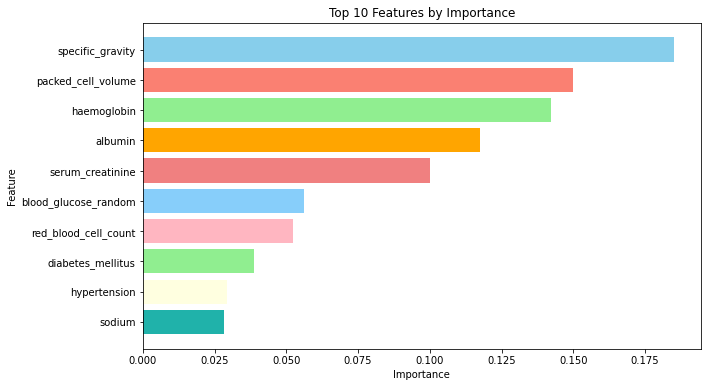

In [127]:
# eady trained the Random Forest model
rd_clf.fit(X_train, y_train)

# Get feature importances from the trained Random Forest model
feature_importances = rd_clf.feature_importances_

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Choose different colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgreen', 'lightyellow', 'lightseagreen']

# Plot the top N features and their importances with different colors
top_n = 10  # Number of top features to display
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_sorted['Feature'][:top_n], feature_importance_df_sorted['Importance'][:top_n], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top

plt.show()


### Model Save 

In [130]:
import joblib

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]
# Save each model
for name, model in models:
    model_filename = f'{name.lower().replace(" ", "_")}_model.joblib'
    joblib.dump(model, model_filename)
    print(f"Model '{name}' saved as '{model_filename}'")


Model 'Logistic Regression' saved as 'logistic_regression_model.joblib'
Model 'Random Forest' saved as 'random_forest_model.joblib'
Model 'Support Vector Machine' saved as 'support_vector_machine_model.joblib'
Model 'Naive Bayes' saved as 'naive_bayes_model.joblib'
Model 'K-Nearest Neighbors' saved as 'k-nearest_neighbors_model.joblib'


In [131]:
import pickle

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]
# Save each model
for name, model in models:
    model_filename = f'{name.lower().replace(" ", "_")}_model.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model '{name}' saved as '{model_filename}'")


Model 'Logistic Regression' saved as 'logistic_regression_model.pkl'
Model 'Random Forest' saved as 'random_forest_model.pkl'
Model 'Support Vector Machine' saved as 'support_vector_machine_model.pkl'
Model 'Naive Bayes' saved as 'naive_bayes_model.pkl'
Model 'K-Nearest Neighbors' saved as 'k-nearest_neighbors_model.pkl'


In [132]:
import pickle

# Create a dictionary to store the models
all_models = {}
for name, model in models:
    all_models[name] = model

# Save the dictionary of models
with open('all_models.pkl', 'wb') as file:
    pickle.dump(all_models, file)

print("All models saved as 'all_models.pkl'")


All models saved as 'all_models.pkl'
